# Universidad Politécnica Salesiana 
### Nombre: Fernando Sanchez 
### Materia: Simulación 
### Tema: Simulación de Eventos.
### Prueba Practica 2
### Fecha: 04/07/2021
### Objetivo:

    •	Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones basados en eventos discretos.

     
### Enunciado:

    •	Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:
    
        En base a los datos del siguiente link 
        https://educacion.gob.ec/wp-content/uploads/downloads/2012/08/AZUAY11.pdf, 
        genere una simulación del ingresos de los estudiantes, para ello debemos escoger un establecimiento y 
        en base a los docentes y estudiantes modelar el reingreso de los estudiantes en base a los siguientes 
        datos.
        
### Establecimiento: 
    •	Cristo Rey, Parroquia Bellavista. 
### Docentes: 
    •	Total Docentes: 10 
### Estudiantes: 
    •	Total Matricula Hombres: 103
    •	Total Matricula Mujeres: 72
    •	Total Matricula : 175


In [1]:
#importar las librerias necesarias
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import random
import simpy
import collections

    ◦	Se tiene un promedio que el 90% de los docentes han sido vacunados y pueden realizar el proceso de 
        ingreso en cada uno de los cursos.

In [2]:
DocentesTotal = 10
DocentesTotalVacunados = int(DocentesTotal*0.9)
print(DocentesTotalVacunados)

9


    ◦	Dentro del procesos se tiene que alrededor del 5% - 10% de los estudiantes no podrán asistir debido a 
        no presentar la vacuna/enfermedades adyacentes.

In [3]:
EstudianteTotal = 175
EstudianteTotalNoVacunados = int(EstudianteTotal*(random.randrange(5,10)/100))
Estudiante_Presente = EstudianteTotal - EstudianteTotalNoVacunados
print(Estudiante_Presente)

160


    ◦	Los estudiantes solo pertenecen a una sola entidad educativa al igual que los docentes.
    
        La entidad educativa Cristo Rey cuenta con 2 cursos iniciales y hasta 8vo año de Educación Basica

In [4]:
cursosTotal = ['curso 1','curso 2','curso 3','curso 4','curso 5',
                 'curso 6','curso 7','curso 8','curso 9','curso 10']
aulaInicial1 = []
aulaInicial2 = []
aulaA1 = []
aulaA2 = []
aulaA3 = []
aulaA4 = []
aulaA5 = []
aulaA6 = []
aulaA7 = []
aulaA8 = []

    ◦	Se va  a tener un periodo de prueba de un mes, posterior a ello se realiza al azar al 10% de 
        estudiantes una prueba PCR para validar que no estén contagiados.

In [5]:
pruebasPCR = int(Estudiante_Presente*0.1)
print(pruebasPCR)

16


    ◦	De la ultima el 2% de los estudiantes dan positivo por lo que se cierra el curso completo.

In [6]:
casosPositivos = int(Estudiante_Presente*0.02)
print(casosPositivos)

3


    ◦	Los estudiantes asisten cada semana y estos están en un horario de 6 horas ya sea diurno o nocturno.

In [7]:
horario = 6*60
print("Minutos de clases por dia "+ str(horario))
diames = 30
diasFines = 8
dias = diames - diasFines
print("Dias del mes de clases " + str(dias))
horasT = horario * dias
print("Minutos de clases por el mes "+ str(horasT))

Minutos de clases por dia 360
Dias del mes de clases 22
Minutos de clases por el mes 7920


    ◦	Tienen un receso 30 minutos dentro del establecimiento en donde se concentran todos los estudiantes y 
        exite un foco de contagio del 2%.

In [8]:
receso = 30
tiempoClase =  horario - receso
tiempoEntrada = tiempoClase/2
salida = 5
tiempoSalida = tiempoEntrada - salida
print("Entrada Tiempo "+ str(tiempoEntrada)+" Entrada Receso " + str(tiempoSalida) + " Receso "+ str(receso))

Entrada Tiempo 165.0 Entrada Receso 160.0 Receso 30


    •	El proceso de simulación desarrollado deberá considerar los siguientes aspectos:
        ◦	Generar un cuaderno de Python para el desarrollo y parametrización de graficas, reportes, y 
            animación (Simpy).


In [12]:
#Número de contagiados total 
contagiadoTotal = 0
#Estudiantes Entrando 
estudianteEntrando = {}
for nocontagio in range(Estudiante_Presente):
    def selectRandom(cursosTotal):
        return random.choice(cursosTotal)
    # Asisgnar una varible de que no eseta contagiado "N"y en que un curso esta.
    estudianteEntrando[nocontagio]= "N",nocontagio,selectRandom(cursosTotal)
    

In [13]:
class Aulas(object):
    def __init__(self, environment):
        # Guardamos como varible el entorno de ejecución 
        self.env=environment
                    
    def entrada_clases(self, name):
        print(f'{name} Entrada a clases: {round(env.now)}')
        yield self.env.timeout(tiempoEntrada)
        
    def sale_receso(self, name):
        print(f'{name} Salida al receso: {round(env.now)}')
        yield self.env.timeout(receso)
    
    def regresa_clases(self, name):
        txt = name
        x = txt.replace("Estudiante ", "")
        print(f'{name} Retorna a clases: {round(env.now)}')
        yield self.env.timeout(tiempoSalida)
        if(int(x) == (Estudiante_Presente-1)):
            i = 0
            while i < casosPositivos:
                aux = random.randrange(len(estudianteEntrando))
                a = estudianteEntrando.get(aux)
                if(a[0] == 'N'):
                    print('Estudiante '+str(aux) +' contagiado')
                    estudianteEntrando[aux] = 'S',aux,a[2]
                    i += 1
                elif (a[0] == 'S'):
                    i = i
                elif i == 3:
                    break;
    
    def sale_casa(self, name):
        print(f'{name} Salida de clases: {round(env.now)}')
        yield self.env.timeout(salida)
    
def ejecutar_simulacion(env, name, estudiantes):
    aulas = Aulas(env)
    with estudiantes.request() as req:
        yield req 
        
        for i in range(Estudiante_Presente):
            
            yield env.process(aulas.entrada_clases(name))
            yield env.process(aulas.sale_receso(name))

            yield env.process(aulas.regresa_clases(name))
            yield env.process(aulas.sale_casa(name))
        

In [14]:
# Creamos el entorno de simulacion
env = simpy.Environment()
print("Estudiante ", Estudiante_Presente)
estudiantes = simpy.Resource(env, capacity=Estudiante_Presente)


for a in range(Estudiante_Presente):
    env.process(ejecutar_simulacion(env, f'Estudiante {a}', estudiantes))

env.run(until=horasT)

Estudiante  160
Estudiante 0 Entrada a clases: 0
Estudiante 1 Entrada a clases: 0
Estudiante 2 Entrada a clases: 0
Estudiante 3 Entrada a clases: 0
Estudiante 4 Entrada a clases: 0
Estudiante 5 Entrada a clases: 0
Estudiante 6 Entrada a clases: 0
Estudiante 7 Entrada a clases: 0
Estudiante 8 Entrada a clases: 0
Estudiante 9 Entrada a clases: 0
Estudiante 10 Entrada a clases: 0
Estudiante 11 Entrada a clases: 0
Estudiante 12 Entrada a clases: 0
Estudiante 13 Entrada a clases: 0
Estudiante 14 Entrada a clases: 0
Estudiante 15 Entrada a clases: 0
Estudiante 16 Entrada a clases: 0
Estudiante 17 Entrada a clases: 0
Estudiante 18 Entrada a clases: 0
Estudiante 19 Entrada a clases: 0
Estudiante 20 Entrada a clases: 0
Estudiante 21 Entrada a clases: 0
Estudiante 22 Entrada a clases: 0
Estudiante 23 Entrada a clases: 0
Estudiante 24 Entrada a clases: 0
Estudiante 25 Entrada a clases: 0
Estudiante 26 Entrada a clases: 0
Estudiante 27 Entrada a clases: 0
Estudiante 28 Entrada a clases: 0
Estudian

Estudiante 127 Salida de clases: 1075
Estudiante 128 Salida de clases: 1075
Estudiante 129 Salida de clases: 1075
Estudiante 130 Salida de clases: 1075
Estudiante 131 Salida de clases: 1075
Estudiante 132 Salida de clases: 1075
Estudiante 133 Salida de clases: 1075
Estudiante 134 Salida de clases: 1075
Estudiante 135 Salida de clases: 1075
Estudiante 136 Salida de clases: 1075
Estudiante 137 Salida de clases: 1075
Estudiante 138 Salida de clases: 1075
Estudiante 139 Salida de clases: 1075
Estudiante 140 Salida de clases: 1075
Estudiante 141 Salida de clases: 1075
Estudiante 142 Salida de clases: 1075
Estudiante 143 Salida de clases: 1075
Estudiante 144 Salida de clases: 1075
Estudiante 145 Salida de clases: 1075
Estudiante 146 Salida de clases: 1075
Estudiante 147 Salida de clases: 1075
Estudiante 148 Salida de clases: 1075
Estudiante 149 Salida de clases: 1075
Estudiante 150 Salida de clases: 1075
Estudiante 151 Salida de clases: 1075
Estudiante 152 Salida de clases: 1075
Estudiante 1

Estudiante 21 Salida al receso: 1965
Estudiante 22 Salida al receso: 1965
Estudiante 23 Salida al receso: 1965
Estudiante 24 Salida al receso: 1965
Estudiante 25 Salida al receso: 1965
Estudiante 26 Salida al receso: 1965
Estudiante 27 Salida al receso: 1965
Estudiante 28 Salida al receso: 1965
Estudiante 29 Salida al receso: 1965
Estudiante 30 Salida al receso: 1965
Estudiante 31 Salida al receso: 1965
Estudiante 32 Salida al receso: 1965
Estudiante 33 Salida al receso: 1965
Estudiante 34 Salida al receso: 1965
Estudiante 35 Salida al receso: 1965
Estudiante 36 Salida al receso: 1965
Estudiante 37 Salida al receso: 1965
Estudiante 38 Salida al receso: 1965
Estudiante 39 Salida al receso: 1965
Estudiante 40 Salida al receso: 1965
Estudiante 41 Salida al receso: 1965
Estudiante 42 Salida al receso: 1965
Estudiante 43 Salida al receso: 1965
Estudiante 44 Salida al receso: 1965
Estudiante 45 Salida al receso: 1965
Estudiante 46 Salida al receso: 1965
Estudiante 47 Salida al receso: 1965
E

Estudiante 117 Entrada a clases: 2880
Estudiante 118 Entrada a clases: 2880
Estudiante 119 Entrada a clases: 2880
Estudiante 120 Entrada a clases: 2880
Estudiante 121 Entrada a clases: 2880
Estudiante 122 Entrada a clases: 2880
Estudiante 123 Entrada a clases: 2880
Estudiante 124 Entrada a clases: 2880
Estudiante 125 Entrada a clases: 2880
Estudiante 126 Entrada a clases: 2880
Estudiante 127 Entrada a clases: 2880
Estudiante 128 Entrada a clases: 2880
Estudiante 129 Entrada a clases: 2880
Estudiante 130 Entrada a clases: 2880
Estudiante 131 Entrada a clases: 2880
Estudiante 132 Entrada a clases: 2880
Estudiante 133 Entrada a clases: 2880
Estudiante 134 Entrada a clases: 2880
Estudiante 135 Entrada a clases: 2880
Estudiante 136 Entrada a clases: 2880
Estudiante 137 Entrada a clases: 2880
Estudiante 138 Entrada a clases: 2880
Estudiante 139 Entrada a clases: 2880
Estudiante 140 Entrada a clases: 2880
Estudiante 141 Entrada a clases: 2880
Estudiante 142 Entrada a clases: 2880
Estudiante 1

Estudiante 145 Retorna a clases: 3795
Estudiante 146 Retorna a clases: 3795
Estudiante 147 Retorna a clases: 3795
Estudiante 148 Retorna a clases: 3795
Estudiante 149 Retorna a clases: 3795
Estudiante 150 Retorna a clases: 3795
Estudiante 151 Retorna a clases: 3795
Estudiante 152 Retorna a clases: 3795
Estudiante 153 Retorna a clases: 3795
Estudiante 154 Retorna a clases: 3795
Estudiante 155 Retorna a clases: 3795
Estudiante 156 Retorna a clases: 3795
Estudiante 157 Retorna a clases: 3795
Estudiante 158 Retorna a clases: 3795
Estudiante 159 Retorna a clases: 3795
Estudiante 28 contagiado
Estudiante 79 contagiado
Estudiante 114 contagiado
Estudiante 0 Salida de clases: 3955
Estudiante 1 Salida de clases: 3955
Estudiante 2 Salida de clases: 3955
Estudiante 3 Salida de clases: 3955
Estudiante 4 Salida de clases: 3955
Estudiante 5 Salida de clases: 3955
Estudiante 6 Salida de clases: 3955
Estudiante 7 Salida de clases: 3955
Estudiante 8 Salida de clases: 3955
Estudiante 9 Salida de clases:

Estudiante 134 Retorna a clases: 4875
Estudiante 135 Retorna a clases: 4875
Estudiante 136 Retorna a clases: 4875
Estudiante 137 Retorna a clases: 4875
Estudiante 138 Retorna a clases: 4875
Estudiante 139 Retorna a clases: 4875
Estudiante 140 Retorna a clases: 4875
Estudiante 141 Retorna a clases: 4875
Estudiante 142 Retorna a clases: 4875
Estudiante 143 Retorna a clases: 4875
Estudiante 144 Retorna a clases: 4875
Estudiante 145 Retorna a clases: 4875
Estudiante 146 Retorna a clases: 4875
Estudiante 147 Retorna a clases: 4875
Estudiante 148 Retorna a clases: 4875
Estudiante 149 Retorna a clases: 4875
Estudiante 150 Retorna a clases: 4875
Estudiante 151 Retorna a clases: 4875
Estudiante 152 Retorna a clases: 4875
Estudiante 153 Retorna a clases: 4875
Estudiante 154 Retorna a clases: 4875
Estudiante 155 Retorna a clases: 4875
Estudiante 156 Retorna a clases: 4875
Estudiante 157 Retorna a clases: 4875
Estudiante 158 Retorna a clases: 4875
Estudiante 159 Retorna a clases: 4875
Estudiante 2

Estudiante 10 Salida de clases: 5755
Estudiante 11 Salida de clases: 5755
Estudiante 12 Salida de clases: 5755
Estudiante 13 Salida de clases: 5755
Estudiante 14 Salida de clases: 5755
Estudiante 15 Salida de clases: 5755
Estudiante 16 Salida de clases: 5755
Estudiante 17 Salida de clases: 5755
Estudiante 18 Salida de clases: 5755
Estudiante 19 Salida de clases: 5755
Estudiante 20 Salida de clases: 5755
Estudiante 21 Salida de clases: 5755
Estudiante 22 Salida de clases: 5755
Estudiante 23 Salida de clases: 5755
Estudiante 24 Salida de clases: 5755
Estudiante 25 Salida de clases: 5755
Estudiante 26 Salida de clases: 5755
Estudiante 27 Salida de clases: 5755
Estudiante 28 Salida de clases: 5755
Estudiante 29 Salida de clases: 5755
Estudiante 30 Salida de clases: 5755
Estudiante 31 Salida de clases: 5755
Estudiante 32 Salida de clases: 5755
Estudiante 33 Salida de clases: 5755
Estudiante 34 Salida de clases: 5755
Estudiante 35 Salida de clases: 5755
Estudiante 36 Salida de clases: 5755
E

Estudiante 66 Salida al receso: 6645
Estudiante 67 Salida al receso: 6645
Estudiante 68 Salida al receso: 6645
Estudiante 69 Salida al receso: 6645
Estudiante 70 Salida al receso: 6645
Estudiante 71 Salida al receso: 6645
Estudiante 72 Salida al receso: 6645
Estudiante 73 Salida al receso: 6645
Estudiante 74 Salida al receso: 6645
Estudiante 75 Salida al receso: 6645
Estudiante 76 Salida al receso: 6645
Estudiante 77 Salida al receso: 6645
Estudiante 78 Salida al receso: 6645
Estudiante 79 Salida al receso: 6645
Estudiante 80 Salida al receso: 6645
Estudiante 81 Salida al receso: 6645
Estudiante 82 Salida al receso: 6645
Estudiante 83 Salida al receso: 6645
Estudiante 84 Salida al receso: 6645
Estudiante 85 Salida al receso: 6645
Estudiante 86 Salida al receso: 6645
Estudiante 87 Salida al receso: 6645
Estudiante 88 Salida al receso: 6645
Estudiante 89 Salida al receso: 6645
Estudiante 90 Salida al receso: 6645
Estudiante 91 Salida al receso: 6645
Estudiante 92 Salida al receso: 6645
E

Estudiante 61 Retorna a clases: 7395
Estudiante 62 Retorna a clases: 7395
Estudiante 63 Retorna a clases: 7395
Estudiante 64 Retorna a clases: 7395
Estudiante 65 Retorna a clases: 7395
Estudiante 66 Retorna a clases: 7395
Estudiante 67 Retorna a clases: 7395
Estudiante 68 Retorna a clases: 7395
Estudiante 69 Retorna a clases: 7395
Estudiante 70 Retorna a clases: 7395
Estudiante 71 Retorna a clases: 7395
Estudiante 72 Retorna a clases: 7395
Estudiante 73 Retorna a clases: 7395
Estudiante 74 Retorna a clases: 7395
Estudiante 75 Retorna a clases: 7395
Estudiante 76 Retorna a clases: 7395
Estudiante 77 Retorna a clases: 7395
Estudiante 78 Retorna a clases: 7395
Estudiante 79 Retorna a clases: 7395
Estudiante 80 Retorna a clases: 7395
Estudiante 81 Retorna a clases: 7395
Estudiante 82 Retorna a clases: 7395
Estudiante 83 Retorna a clases: 7395
Estudiante 84 Retorna a clases: 7395
Estudiante 85 Retorna a clases: 7395
Estudiante 86 Retorna a clases: 7395
Estudiante 87 Retorna a clases: 7395
E

In [16]:
print(estudianteEntrando)

estudianteEntrando


    •	Cuantos contagiados tengo al final del mes.

In [17]:
for i in range(Estudiante_Presente):
    a = estudianteEntrando.get(i)
    if(a[0] == 'S'):
        contagiadoTotal += 1
        #print(a)
print("Total contagiados tengo al final del mes ", contagiadoTotal)

Total contagiados tengo al final del mes  66


    •	Cuantos cursos debo cerrar.

In [18]:
aulaInicialT1 = []
aulaInicialT2 = []
aulaAT1 = []
aulaAT2 = []
aulaAT3 = []
aulaAT4 = []
aulaAT5 = []
aulaAT6 = []
aulaAT7 = []
aulaAT8 = []
curso1 = 0
curso2 = 0
curso3 = 0
curso4 = 0
curso5 = 0
curso6 = 0
curso7 = 0
curso8 = 0
curso9 = 0
curso10 = 0
e = 0
for i in range(Estudiante_Presente):
    a = estudianteEntrando.get(i)
    if(a[2] == 'curso 1'):
        curso1 += 1
        aulaInicialT1.append(curso1)
    elif(a[2] == 'curso 2'):
        curso2 += 1
        aulaInicialT2.append(curso2)
    elif(a[2] == 'curso 3'):
        curso3 += 1
        aulaAT1.append(curso3)
    elif(a[2] == 'curso 4'):
        curso4 += 1
        aulaAT2.append(curso4)
    elif(a[2] == 'curso 5'):
        curso5 += 1
        aulaAT3.append(curso5)
    elif(a[2] == 'curso 6'):
        curso6 += 1
        aulaAT4.append(curso6)
    elif(a[2] == 'curso 7'):
        curso7 += 1
        aulaAT5.append(curso7)
    elif(a[2] == 'curso 8'):
        curso8 += 1
        aulaAT6.append(curso8)
    elif(a[2] == 'curso 9'):
        curso9 += 1
        aulaAT7.append(curso9)
    elif(a[2] == 'curso 10'):
        curso10 += 1
        aulaAT8.append(curso10)

In [19]:
curso1 = 0
curso2 = 0
curso3 = 0
curso4 = 0
curso5 = 0
curso6 = 0
curso7 = 0
curso8 = 0
curso9 = 0
curso10 = 0
e = 0
for i in range(Estudiante_Presente):
    a = estudianteEntrando.get(i)
    if(a[0] == 'S'):
        if(a[2] == 'curso 1'):
            curso1 += 1
            aulaInicial1.append(curso1)
        elif(a[2] == 'curso 2'):
            curso2 += 1
            aulaInicial2.append(curso2)
        elif(a[2] == 'curso 3'):
            curso3 += 1
            aulaA1.append(curso3)
        elif(a[2] == 'curso 4'):
            curso4 += 1
            aulaA2.append(curso4)
        elif(a[2] == 'curso 5'):
            curso5 += 1
            aulaA3.append(curso5)
        elif(a[2] == 'curso 6'):
            curso6 += 1
            aulaA4.append(curso6)
        elif(a[2] == 'curso 7'):
            curso7 += 1
            aulaA5.append(curso7)
        elif(a[2] == 'curso 8'):
            curso8 += 1
            aulaA6.append(curso8)
        elif(a[2] == 'curso 9'):
            curso9 += 1
            aulaA7.append(curso9)
        elif(a[2] == 'curso 10'):
            curso10 += 1
            aulaA8.append(curso10)
        e += 1


In [20]:
print("Total cursos deben cerrar porque pasan del 2% a aforo permitido ")
print(len(aulaInicial1)*100/len(aulaInicialT1),'%')
print(len(aulaInicial2)*100/len(aulaInicialT2),'%')
print(len(aulaA1)*100/len(aulaAT1),'%')
print(len(aulaA2)*100/len(aulaAT2),'%')
print(len(aulaA3)*100/len(aulaAT3),'%')
print(len(aulaA4)*100/len(aulaAT4),'%')
print(len(aulaA5)*100/len(aulaAT5),'%')
print(len(aulaA6)*100/len(aulaAT6),'%')
print(len(aulaA7)*100/len(aulaAT7),'%')
print(len(aulaA8)*100/len(aulaAT8),'%')


Total cursos deben cerrar porque pasan del 2% a aforo permitido 
42.857142857142854 %
36.36363636363637 %
46.15384615384615 %
50.0 %
33.333333333333336 %
35.0 %
45.0 %
33.333333333333336 %
58.333333333333336 %
37.5 %


    •	Cuantos estudiantes y docentes ingresan y salen al final del mes.

In [21]:
print("Número de estudiantes ingresados: " + str(Estudiante_Presente) )
print("Número de docentes ingresados: " + str(DocentesTotalVacunados))
print("Número de estudiantes que  salen: " + str(Estudiante_Presente-contagiadoTotal) )
print("Número de docentes que salen: " + str(DocentesTotalVacunados))

Número de estudiantes ingresados: 160
Número de docentes ingresados: 9
Número de estudiantes que  salen: 94
Número de docentes que salen: 9


In [24]:
print(aulaInicialT1)
print(aulaInicialT2)
print(aulaAT1)
print(aulaAT2)
print(aulaAT3)
print(aulaAT4)
print(aulaAT5)
print(aulaAT6)
print(aulaAT7)
print(aulaAT8)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]


In [35]:
print(aulaInicial1)
print(aulaInicial2)
print(aulaA1)
print(aulaA2)
print(aulaA3)
print(aulaA4)
print(aulaA5)
print(aulaA6)
print(aulaA7)
print(aulaA8)

[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6]
[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6]


    ◦	Generar una animación en 2D/3D del modelo propuesto.
   ### Grafica en 3D de la aula Inicial 1

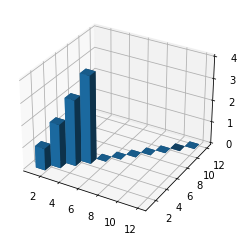

In [37]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos
x3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
y3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
z3 = np.zeros(14)

dx = np.ones(14)
dy = np.ones(14)
dz = [1, 2, 3, 4, 5, 6, 0, 0, 0,  0,  0,  0,  0,  0]

# utilizamos el método bar3d para graficar las barras
ax1.bar3d(x3, y3, z3, dx, dy, dz)

# Mostramos el gráfico
plt.show()

   ### Grafica en 3D de la aula Inicial 2

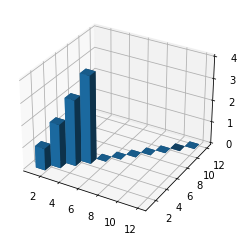

In [38]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')

# Definimos los datos
x3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
y3 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
z3 = np.zeros(11)

dx = np.ones(11)
dy = np.ones(11)
dz = [1, 2, 3, 4, 0, 0, 0, 0, 0, 0,  0]

# utilizamos el método bar3d para graficar las barras
ax1.bar3d(x3, y3, z3, dx, dy, dz)

# Mostramos el gráfico
plt.show()

## ▪	Conclusiones

    En esta practica se aplicó los conocimientos adquiridos en clase para desarrollar simulaciones basados en 
    eventos discretos, con una base de datos pequeña la simulación de cerrar cursos es muy alta por la tasa de 
    contagio del 2% que propaga por la hora de receso dentro de la institucion educativa
